# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [3]:
img1 = x_train[0]

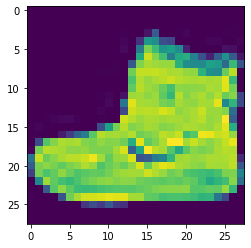

In [4]:
plt.imshow(img1)

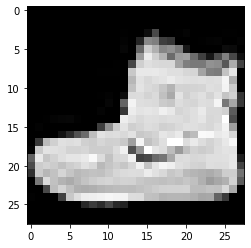

In [5]:
plt.imshow(img1, cmap='gray')

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
print(x_train.max())

255


In [7]:
x_test = x_test/x_test.max()

In [8]:
x_train = x_train/x_train.max()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
from keras.utils import to_categorical

In [13]:
y_train_categorical = to_categorical(y_train)

In [14]:
y_test_categorical = to_categorical(y_test)

In [15]:
x_test.dtype

dtype('float64')

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, MaxPooling2D, Dense, Conv2D, Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [22]:
model.fit(x_train, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6896 - accuracy: 0.7584
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3656 - accuracy: 0.8699
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3117 - accuracy: 0.8861
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2936 - accuracy: 0.8932
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2711 - accuracy: 0.8967


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
model.metrics_names

['loss', 'accuracy']

In [25]:
model.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.8989


[0.27312779426574707, 0.8988999724388123]

In [26]:
predictions = model.predict_classes(x_test)

C:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.81      0.83      1000
           3       0.89      0.91      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.96      0.99      0.98      1000
           6       0.69      0.75      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [32]:
y_test_categorical.shape

(10000, 10)

In [33]:
predictions.shape

(10000,)

In [34]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [35]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [36]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Great Job!